In [238]:
import pandas as pd
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [239]:
cs_ibx_peak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_IBX_peak.csv')
cs_ibx_offpeak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_IBX_offpeak.csv')
cs_noibx_peak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_noIBX_peak.csv')
cs_noibx_offpeak = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Network Processing\ctrl_scrs_sta_noIBX_offpeak.csv')

In [240]:
cs_ibx_peak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)
cs_ibx_offpeak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)
cs_noibx_peak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)
cs_noibx_offpeak.rename({'Unnamed: 0':'complex_id'},axis=1,inplace=True)

In [241]:
#merge the centrality scores together
mg = pd.merge(cs_ibx_peak, cs_ibx_offpeak, on='complex_id',how='left')
mg = pd.merge(mg, cs_noibx_peak, on='complex_id',how='left')
mg = pd.merge(mg, cs_noibx_offpeak, on='complex_id',how='left')
mg.columns = ['Complex_id','cs_ibx_peak','cs_ibx_offpeak','cs_noibx_peak','cs_noibx_offpeak']
mg.head()

,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak
0,614c,0.022481,0.013806,0.022649,0.013907
1,611c,0.025420,0.016341,0.025604,0.016466
2,601c,0.024272,0.014947,0.024396,0.015019
3,635c,0.020350,0.012717,0.020454,0.012778
4,620c,0.021319,0.013528,0.021334,0.013548


In [242]:
sts = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\stations_list (1).csv')
sts.head()

,Unnamed: 0,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Direction Notes,ADA NB,ADA SB,Capital Outage NB,Capital Outage SB
0,118,119,119,L06,BMT,Canarsie,1 AV,M,L,Subway,40.730953,-73.981628,8 Av,Brooklyn,1,NaN,NaN,NaN,NaN,NaN
1,395,395,395,624,IRT,Lexington Av,103 ST,M,6,Subway,40.790600,-73.947478,Uptown & The Bronx,Downtown,0,NaN,NaN,NaN,NaN,NaN
2,155,156,156,A18,IND,8th Av - Fulton St,103 ST,M,B C,Subway,40.796092,-73.961454,Uptown & The Bronx,Downtown & Brooklyn,0,NaN,NaN,NaN,NaN,NaN
3,309,309,309,119,IRT,Broadway - 7Av,103 ST,M,1,Subway,40.799446,-73.968379,Uptown & The Bronx,Downtown,0,NaN,NaN,NaN,NaN,NaN
4,450,450,450,706,IRT,Flushing,103 ST-CORONA PLAZA,Q,7,Elevated,40.749865,-73.862700,Flushing,Manhattan,0,NaN,NaN,NaN,NaN,NaN


In [243]:
sts['Complex ID'] = sts['Complex ID'].astype(str)

In [244]:
#write a new complex_id column. Keep the old one "Complex_id" (with a capital C) for reference
#merge in the complex ID name based on the GTFS Stop ID. This will return NaNs for the actual complex ids, which currently end in the letter "c"
mg = pd.merge(mg, sts[['Complex ID', 'GTFS Stop ID', 'Station ID']],left_on = 'Complex_id', right_on='GTFS Stop ID',how='left', indicator = True)
mg['complex_id'] = np.where(mg._merge == 'left_only',mg.Complex_id,mg['Complex ID'])

#strip the "c" from the remaining complex ids
mg['complex_id'] = mg['complex_id'].str.strip(to_strip='c')
mg.drop(['Complex ID', 'GTFS Stop ID', 'Station ID','_merge'],axis=1,inplace=True)

In [245]:
mg.head()

,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,complex_id
0,614c,0.022481,0.013806,0.022649,0.013907,614
1,611c,0.025420,0.016341,0.025604,0.016466,611
2,601c,0.024272,0.014947,0.024396,0.015019,601
3,635c,0.020350,0.012717,0.020454,0.012778,635
4,620c,0.021319,0.013528,0.021334,0.013548,620


In [246]:
#bring back in the stop name for easy reference later.
sts_nd = sts.drop_duplicates(subset='Complex ID')
mg = pd.merge(mg,sts_nd[['Complex ID', 'Stop Name']],left_on='complex_id',right_on='Complex ID',how='left')
mg.drop(['Complex ID'],axis=1,inplace=True)
mg = mg[['complex_id', 'Stop Name','Complex_id','cs_ibx_peak', 'cs_ibx_offpeak', 'cs_noibx_peak','cs_noibx_offpeak']]

In [247]:

mg.head()

,complex_id,Stop Name,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak
0,614,59 ST-COLUMBUS CIRCLE,614c,0.022481,0.013806,0.022649,0.013907
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,0.025420,0.016341,0.025604,0.016466
2,601,14 ST,601c,0.024272,0.014947,0.024396,0.015019
3,635,SOUTH FERRY,635c,0.020350,0.012717,0.020454,0.012778
4,620,BOROUGH HALL,620c,0.021319,0.013528,0.021334,0.013548


In [248]:
mg.shape

(433, 7)

In [249]:
#mg.to_csv('complex_centralities.csv')

In [250]:
wd_ev = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekday_evening.csv')
wd_mr = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekday_morning.csv')
wd_ov = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekday_overnight.csv')
we_ev = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekend_evening.csv')
we_mr = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekend_morning.csv')
we_ov = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\Turnstile Data Processing\weekend_overnight.csv')

In [251]:
wd_ev.shape

(426, 6)

In [252]:
wd_ev['complex_id'] = wd_ev['complex_id'].astype(str)
wd_mr['complex_id'] = wd_mr['complex_id'].astype(str)
wd_ov['complex_id'] = wd_ov['complex_id'].astype(str)
we_ev['complex_id'] = we_ev['complex_id'].astype(str)
we_mr['complex_id'] = we_mr['complex_id'].astype(str)
we_ov['complex_id'] = we_ov['complex_id'].astype(str)

In [253]:
wd_ov.head()

,Unnamed: 0,DOW,TOD,complex_id,avg(entries),avg(exits)
0,0,weekday,overnight,1,238.775,460.675
1,1,weekday,overnight,10,312.525,438.525
2,2,weekday,overnight,100,68.100,183.425
3,3,weekday,overnight,101,280.075,533.175
4,4,weekday,overnight,103,45.800,120.475


In [254]:
we_ov.head()

,Unnamed: 0,DOW,TOD,complex_id,avg(entries),avg(exits)
0,0,weekend,overnight,1,135.3750,618.1250
1,1,weekend,overnight,10,558.5625,648.3125
2,2,weekend,overnight,100,75.7500,276.5625
3,3,weekend,overnight,101,341.5625,755.0625
4,4,weekend,overnight,103,136.0000,214.5625


In [255]:
for d in [wd_ev, wd_mr, we_ev, we_mr, we_ov]:   #leaving out wd_ov until Turbold confirms
    n = d.loc[0,'DOW'] + "_" + d.loc[0,'TOD']
    ts_1 = d[['complex_id','avg(exits)','avg(entries)']]
    ts_1.rename({'avg(exits)':f'exits_{n}','avg(entries)':f'entries_{n}'},axis=1,inplace=True)
    mg = pd.merge(mg,ts_1,how='left',left_on='complex_id',right_on='complex_id')

In [256]:
mg.head()

,complex_id,Stop Name,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight
0,614,59 ST-COLUMBUS CIRCLE,614c,0.022481,0.013806,0.022649,0.013907,10926.175,15541.200,25226.700,12127.425,9207.0625,8656.6875,13438.0000,6768.7500,992.0000,907.3750
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,0.025420,0.016341,0.025604,0.016466,47538.800,32175.925,51746.825,35712.750,36982.0625,23756.8125,32989.3125,18093.7500,4894.6875,5036.8750
2,601,14 ST,601c,0.024272,0.014947,0.024396,0.015019,8016.600,8628.425,13483.025,7083.525,6736.9375,5749.5000,8523.2500,3904.2500,1071.5000,849.1875
3,635,SOUTH FERRY,635c,0.020350,0.012717,0.020454,0.012778,6610.825,6476.900,8226.100,5440.325,4171.1250,3599.3750,3936.9375,2295.0625,1291.6875,506.0000
4,620,BOROUGH HALL,620c,0.021319,0.013528,0.021334,0.013548,4562.675,6676.150,9676.825,7114.125,2953.6250,2399.4375,3803.0000,2498.2500,334.3750,187.5625


In [257]:
mg.columns

Index(['complex_id', 'Stop Name', 'Complex_id', 'cs_ibx_peak',
       'cs_ibx_offpeak', 'cs_noibx_peak', 'cs_noibx_offpeak',
       'exits_weekday_evening', 'entries_weekday_evening',
       'exits_weekday_morning', 'entries_weekday_morning',
       'exits_weekend_evening', 'entries_weekend_evening',
       'exits_weekend_morning', 'entries_weekend_morning',
       'exits_weekend_overnight', 'entries_weekend_overnight'],
      dtype='object')

In [258]:
pd.set_option('max_columns',None)
att = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ADS\IBX Project\IBXRidership\attributes_now_final.csv')
att = att[['VoroID', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num',
       'black_num', 'asian_num', 'other_num', 'multirace_num', 'total_houses',
       'occupied_homes_num', 'vacant_homes_num','Bus_Stops', 'geometry', 'station_id',
       'station_line', 'Complex ID', 'boro', 'lat', 'long']]
att.head()

,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,station_id,station_line,Complex ID,boro,lat,long
0,0.0,0.721995,0.526187,0.193010,0.317475,0.023798,0.030679,0.009681,0.007365,0.004001,0.117446,0.000186,0.000267,0.000296,0.000343,25.960214,0.000978,0.000926,0.000052,0.000008,0.000203,0.000195,0.000151,0.000123,0.000450,0.000026,0.000033,0.000310,0.000296,0.000014,124.0,POLYGON ((1043846.6598873622 192644.5784542074...,F02,station,255,Q,40.710470,-73.793604
1,1.0,0.702943,0.277050,0.052221,0.217220,0.006540,0.011320,0.004049,0.003198,0.001824,0.025249,0.000185,0.000224,0.000188,0.000201,12.844385,0.000579,0.000571,0.000007,0.000003,0.000108,0.000073,0.000080,0.000234,0.000150,0.000018,0.000025,0.000201,0.000192,0.000009,1213.0,POLYGON ((1043846.6598873622 192644.5784542074...,F01,station,254,Q,40.712646,-73.783817
2,2.0,0.912958,0.445644,0.103374,0.318764,0.019617,0.024663,0.014488,0.004529,0.006397,0.032445,0.000157,0.000227,0.000304,0.000339,23.289861,0.000814,0.000805,0.000008,0.000005,0.000137,0.000135,0.000183,0.000017,0.000463,0.000005,0.000011,0.000313,0.000296,0.000017,667.0,POLYGON ((1033696.0337639538 207772.8402877239...,701,station,447,Q,40.759600,-73.830030
3,3.0,0.799160,0.635241,0.212168,0.413264,0.025066,0.025528,0.016669,0.000892,0.000565,0.142725,0.000199,0.000291,0.000519,0.000604,31.878820,0.001265,0.001213,0.000052,0.000008,0.000251,0.000311,0.000195,0.000154,0.000538,0.000029,0.000039,0.000443,0.000410,0.000033,76.0,POLYGON ((1038286.4264113249 195703.2588630201...,F03,station,256,Q,40.707564,-73.803326
4,4.0,0.704475,0.777028,0.186017,0.566206,0.035161,0.027051,0.010961,0.002108,0.001231,0.109117,0.000201,0.000320,0.000605,0.000645,35.056024,0.001742,0.001703,0.000039,0.000028,0.000348,0.000556,0.000214,0.000201,0.000636,0.000066,0.000069,0.000626,0.000598,0.000029,12.0,POLYGON ((1036244.6304449412 194813.8421750872...,F04,station,257,Q,40.705460,-73.810708


In [259]:
att['Complex ID'] = att['Complex ID'].astype(str)

In [260]:
mg = pd.merge(mg,att,how='left',left_on='complex_id',right_on='Complex ID')
mg.head()

,complex_id,Stop Name,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,station_id,station_line,Complex ID,boro,lat,long
0,614,59 ST-COLUMBUS CIRCLE,614c,0.022481,0.013806,0.022649,0.013907,10926.175,15541.200,25226.700,12127.425,9207.0625,8656.6875,13438.0000,6768.7500,992.0000,907.3750,303.0,0.738673,3.999788,1.701380,2.050518,0.695318,0.235923,0.136989,0.017545,0.000000,0.615605,0.000039,0.000368,0.002042,0.002232,673.514985,0.002939,0.002672,0.000267,0.000000,0.000267,0.000332,0.001794,0.000130,0.000540,0.000028,0.000116,0.001933,0.001600,0.000333,29.0,POLYGON ((990236.0543776825 218861.07537803546...,complex,complex,614,M,40.768271,-73.981832
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,0.025420,0.016341,0.025604,0.016466,47538.800,32175.925,51746.825,35712.750,36982.0625,23756.8125,32989.3125,18093.7500,4894.6875,5036.8750,289.0,0.651524,7.952551,6.056146,0.705022,4.931102,0.600660,0.183484,0.043627,0.031677,0.265596,0.000084,0.000758,0.001083,0.002247,1192.259553,0.001552,0.001391,0.000161,0.000003,0.000103,0.000278,0.000727,0.000207,0.000271,0.000016,0.000053,0.001055,0.000919,0.000136,22.0,POLYGON ((986940.1379654831 213865.68954273767...,complex,complex,611,M,40.755746,-73.987581
2,601,14 ST,601c,0.024272,0.014947,0.024396,0.015019,8016.600,8628.425,13483.025,7083.525,6736.9375,5749.5000,8523.2500,3904.2500,1071.5000,849.1875,338.0,0.658766,3.765381,1.446336,2.236013,0.793532,0.363214,0.044622,0.010252,0.000288,0.234426,0.000169,0.000807,0.002373,0.002710,554.047555,0.003397,0.003282,0.000115,0.000000,0.000313,0.000274,0.002578,0.000082,0.000283,0.000034,0.000146,0.002251,0.001975,0.000276,11.0,"POLYGON ((984311.361812786 208635.71960600044,...",complex,complex,601,M,40.737796,-73.997732
3,635,SOUTH FERRY,635c,0.020350,0.012717,0.020454,0.012778,6610.825,6476.900,8226.100,5440.325,4171.1250,3599.3750,3936.9375,2295.0625,1291.6875,506.0000,223.0,0.772645,5.558198,5.165286,0.283071,4.694242,0.148067,0.053092,0.016283,0.000000,0.253601,0.000025,0.000309,0.000260,0.000635,495.274908,0.000487,0.000446,0.000041,0.000000,0.000075,0.000054,0.000277,0.000036,0.000086,0.000008,0.000026,0.000271,0.000218,0.000053,13.0,POLYGON ((980986.4055763358 195840.87311689934...,complex,complex,635,M,40.702249,-74.013100
4,620,BOROUGH HALL,620c,0.021319,0.013528,0.021334,0.013548,4562.675,6676.150,9676.825,7114.125,2953.6250,2399.4375,3803.0000,2498.2500,334.3750,187.5625,25.0,0.713186,3.124351,1.786740,1.257566,1.132177,0.165287,0.121082,0.011451,0.000149,0.355108,0.000132,0.000560,0.001245,0.004967,315.954362,0.002150,0.002051,0.000099,0.000009,0.000335,0.000192,0.001478,0.000090,0.000243,0.000017,0.000130,0.001140,0.001049,0.000091,25.0,"POLYGON ((983946.3076435457 190667.0264045154,...",complex,complex,620,Bk,40.693241,-73.990642


In [261]:
mg_noIBX = mg[~mg['lotarea'].isna()]
mg_noIBX.shape

(424, 55)

In [262]:
mg.shape

(433, 55)

In [263]:
mg_noIBX = mg_noIBX[['complex_id', 'Stop Name', 'Complex_id','exits_weekday_evening', 'entries_weekday_evening',
       'exits_weekday_morning', 'entries_weekday_morning',
       #'exits_weekday_overnight', 'entries_weekday_overnight',
       'exits_weekend_evening', 'entries_weekend_evening',
       'exits_weekend_morning', 'entries_weekend_morning',
       'exits_weekend_overnight', 'entries_weekend_overnight','cs_ibx_peak',
       'cs_ibx_offpeak', 'cs_noibx_peak', 'cs_noibx_offpeak','VoroID',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
       'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
       'vacant_homes_num', 'Bus_Stops', 'geometry','Complex ID', 'boro', 'lat', 'long']]
mg_noIBX.head()

,complex_id,Stop Name,Complex_id,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,Complex ID,boro,lat,long
0,614,59 ST-COLUMBUS CIRCLE,614c,10926.175,15541.200,25226.700,12127.425,9207.0625,8656.6875,13438.0000,6768.7500,992.0000,907.3750,0.022481,0.013806,0.022649,0.013907,303.0,0.738673,3.999788,1.701380,2.050518,0.695318,0.235923,0.136989,0.017545,0.000000,0.615605,0.000039,0.000368,0.002042,0.002232,673.514985,0.002939,0.002672,0.000267,0.000000,0.000267,0.000332,0.001794,0.000130,0.000540,0.000028,0.000116,0.001933,0.001600,0.000333,29.0,POLYGON ((990236.0543776825 218861.07537803546...,614,M,40.768271,-73.981832
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,47538.800,32175.925,51746.825,35712.750,36982.0625,23756.8125,32989.3125,18093.7500,4894.6875,5036.8750,0.025420,0.016341,0.025604,0.016466,289.0,0.651524,7.952551,6.056146,0.705022,4.931102,0.600660,0.183484,0.043627,0.031677,0.265596,0.000084,0.000758,0.001083,0.002247,1192.259553,0.001552,0.001391,0.000161,0.000003,0.000103,0.000278,0.000727,0.000207,0.000271,0.000016,0.000053,0.001055,0.000919,0.000136,22.0,POLYGON ((986940.1379654831 213865.68954273767...,611,M,40.755746,-73.987581
2,601,14 ST,601c,8016.600,8628.425,13483.025,7083.525,6736.9375,5749.5000,8523.2500,3904.2500,1071.5000,849.1875,0.024272,0.014947,0.024396,0.015019,338.0,0.658766,3.765381,1.446336,2.236013,0.793532,0.363214,0.044622,0.010252,0.000288,0.234426,0.000169,0.000807,0.002373,0.002710,554.047555,0.003397,0.003282,0.000115,0.000000,0.000313,0.000274,0.002578,0.000082,0.000283,0.000034,0.000146,0.002251,0.001975,0.000276,11.0,"POLYGON ((984311.361812786 208635.71960600044,...",601,M,40.737796,-73.997732
3,635,SOUTH FERRY,635c,6610.825,6476.900,8226.100,5440.325,4171.1250,3599.3750,3936.9375,2295.0625,1291.6875,506.0000,0.020350,0.012717,0.020454,0.012778,223.0,0.772645,5.558198,5.165286,0.283071,4.694242,0.148067,0.053092,0.016283,0.000000,0.253601,0.000025,0.000309,0.000260,0.000635,495.274908,0.000487,0.000446,0.000041,0.000000,0.000075,0.000054,0.000277,0.000036,0.000086,0.000008,0.000026,0.000271,0.000218,0.000053,13.0,POLYGON ((980986.4055763358 195840.87311689934...,635,M,40.702249,-74.013100
4,620,BOROUGH HALL,620c,4562.675,6676.150,9676.825,7114.125,2953.6250,2399.4375,3803.0000,2498.2500,334.3750,187.5625,0.021319,0.013528,0.021334,0.013548,25.0,0.713186,3.124351,1.786740,1.257566,1.132177,0.165287,0.121082,0.011451,0.000149,0.355108,0.000132,0.000560,0.001245,0.004967,315.954362,0.002150,0.002051,0.000099,0.000009,0.000335,0.000192,0.001478,0.000090,0.000243,0.000017,0.000130,0.001140,0.001049,0.000091,25.0,"POLYGON ((983946.3076435457 190667.0264045154,...",620,Bk,40.693241,-73.990642


In [264]:
#mg_noIBX.to_csv('mg_noIBX.csv')

In [265]:
mg.loc[:,'exits_weekday_evening':'entries_weekend_overnight'].sum()

exits_weekday_evening        1.270837e+06
entries_weekday_evening      9.560217e+05
exits_weekday_morning        1.431524e+06
entries_weekday_morning      1.232407e+06
exits_weekend_evening        8.354603e+05
entries_weekend_evening      5.330644e+05
exits_weekend_morning        7.274032e+05
entries_weekend_morning      5.520556e+05
exits_weekend_overnight      1.828731e+05
entries_weekend_overnight    9.176140e+04
dtype: float64

In [266]:
mg.columns

Index(['complex_id', 'Stop Name', 'Complex_id', 'cs_ibx_peak',
       'cs_ibx_offpeak', 'cs_noibx_peak', 'cs_noibx_offpeak',
       'exits_weekday_evening', 'entries_weekday_evening',
       'exits_weekday_morning', 'entries_weekday_morning',
       'exits_weekend_evening', 'entries_weekend_evening',
       'exits_weekend_morning', 'entries_weekend_morning',
       'exits_weekend_overnight', 'entries_weekend_overnight', 'VoroID',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
       'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
       'vacant_homes_num', 'Bus_Stops', 'geometry', 'station_id',
       'station_line', 'Complex ID', 'boro', 'lat

In [267]:
#fillna for the 2 stations Alec had to add manually that don't have voronoi polygon IDs or geometry
mg_noIBX.fillna(0,inplace=True)

In [268]:
cols = ['cs_noibx_peak', 'cs_noibx_offpeak','lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'assesstot', 'Total_pop_Num',
       'housed_pop_Num', 'group_house_pop_num', 'industrial_pop_num',
       'under18_num', 'hispanic_num', 'white_num', 'black_num', 'asian_num',
       'other_num', 'multirace_num', 'total_houses', 'occupied_homes_num',
       'vacant_homes_num', 'Bus_Stops']

In [269]:
#2, 4,6,17,32
cols[3]

'bldgarea'

In [270]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


  
X_scaled = StandardScaler().fit_transform(mg_noIBX[cols])
X_scaled


array([[ 1.75053833,  1.98518125, -0.04024303, ...,  1.60906846,
         2.95260026, -0.04401865],
       [ 2.69605964,  3.64558522, -0.40138628, ...,  0.26414217,
         0.70507022, -0.14367338],
       [ 2.30962327,  2.70685416, -0.37137665, ...,  2.3489531 ,
         2.29558333, -0.30027366],
       ...,
       [-0.83446394, -0.58295088,  1.44211094, ..., -0.67779563,
        -0.55168586,  0.35460026],
       [-0.95351157, -0.69638721,  0.51196987, ..., -0.85124223,
        -0.57263798,  0.46849138],
       [-0.06315055, -0.78498359, -0.33757302, ...,  0.58989197,
         0.00910252, -0.15790977]])

In [271]:
xS = pd.DataFrame(X_scaled)

In [272]:
xS.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.750538,1.985181,-0.040243,1.237818,0.698174,1.988137,0.236738,0.832650,2.396721,-0.116218,-0.516287,3.064553,-1.189888,0.041580,1.868028,1.588360,1.685746,1.082110,0.913861,1.831212,-0.498966,-0.378669,-0.395907,1.537136,-0.503776,1.011180,0.099757,1.022260,1.861346,1.609068,2.952600,-0.044019
1,2.696060,3.645585,-0.401386,3.336000,3.832958,-0.221595,3.930054,3.104227,3.469989,0.658306,0.389211,0.847356,-0.615476,2.016029,0.314397,1.607909,3.416632,-0.340782,-0.457888,0.865744,-0.311038,-1.173320,-0.502391,0.074117,-0.313004,0.067298,-0.398706,-0.321360,0.339020,0.264142,0.705070,-0.143673
2,2.309623,2.706854,-0.371377,1.113392,0.514580,2.292778,0.322374,1.625419,0.264571,-0.332770,-0.508051,0.649907,0.469430,2.263876,2.404096,2.219218,1.287121,1.551484,1.566928,0.448842,-0.498966,-0.156241,-0.509330,2.612668,-0.621751,0.108491,0.334881,1.686733,2.411297,2.348953,2.295583,-0.300274
3,1.048074,1.252694,0.100535,2.065044,3.191671,-0.914572,3.723528,0.285489,0.460069,-0.153699,-0.516287,0.771377,-1.364951,-0.260231,-1.017477,-0.520118,1.091016,-1.433087,-1.469833,-0.223950,-0.498966,-1.307824,-0.942873,-0.543311,-0.735369,-0.579615,-0.745237,-0.925806,-1.020131,-1.119398,-0.244606,-0.271801
4,1.329578,1.752353,-0.145861,0.773124,0.759621,0.685859,0.617649,0.392733,2.029526,-0.297183,-0.512029,1.414389,-0.002816,1.009837,0.577983,5.199817,0.492680,0.272140,0.248454,0.302562,0.012063,-0.050369,-0.672177,1.104040,-0.602759,-0.030931,-0.342770,1.331471,0.486701,0.521213,0.190996,-0.100964


<BarContainer object of 32 artists>

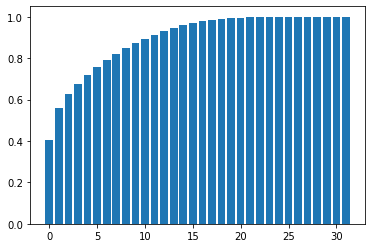

In [273]:
pca = PCA()
pca_data = pca.fit_transform(X_scaled)
ev = pca.explained_variance_ratio_
plt.bar(np.arange(32),ev.cumsum())

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [275]:
pca10 = PCA(10)
X_p = pca10.fit_transform(X_scaled)

model = LinearRegression()
model.fit(X_p,mg_noIBX['exits_weekday_morning'])
cross_val_score(model,X_p,mg_noIBX['exits_weekday_morning'])

array([ 0.18549293,  0.08818662,  0.30791137, -1.14114457, -2.01285197])

In [276]:
mg_noIBX['exits_weekday_evening']

0      10926.175
1      47538.800
2       8016.600
3       6610.825
4       4562.675
         ...    
422     1721.500
423      811.075
424     3465.075
425     1280.000
426      644.725
Name: exits_weekday_evening, Length: 424, dtype: float64

In [277]:
pca_model = sm.OLS(mg_noIBX['exits_weekday_morning'],sm.add_constant(X_p)).fit()
print(pca_model.summary())

                              OLS Regression Results                             
Dep. Variable:     exits_weekday_morning   R-squared:                       0.450
Model:                               OLS   Adj. R-squared:                  0.437
Method:                    Least Squares   F-statistic:                     33.78
Date:                   Tue, 26 Apr 2022   Prob (F-statistic):           8.25e-48
Time:                           20:42:20   Log-Likelihood:                -4137.6
No. Observations:                    424   AIC:                             8297.
Df Residuals:                        413   BIC:                             8342.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3376.2368 

In [278]:
model = sm.OLS(mg_noIBX['exits_weekday_morning'],sm.add_constant(X_scaled)).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     exits_weekday_morning   R-squared:                       0.625
Model:                               OLS   Adj. R-squared:                  0.594
Method:                    Least Squares   F-statistic:                     20.35
Date:                   Tue, 26 Apr 2022   Prob (F-statistic):           1.66e-64
Time:                           20:42:20   Log-Likelihood:                -4056.4
No. Observations:                    424   AIC:                             8179.
Df Residuals:                        391   BIC:                             8312.
Df Model:                             32                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3375.4948 